# Influence diagram

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

In [1]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
from IPython.display import display,HTML

import math

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

## Build a influencediagram

### fast build with string

In [8]:
#gum.fastID("A->*B->$C<-D<-*E->*G->H->*I<-D")
# letter is een kansvariabele
# met * ervoor is een besluit
# $ is een utility functie, die kan niet startpunt zijn
gum.fastID("A->*B->$C<-D<-*E->*G->H->*I<-D")

(pyAgrum.InfluenceDiagram<double>@0x55ddc54c2790) Influence Diagram{
  chance: 3,
  utility: 1,
  decision: 4,
  arcs: 8,
  domainSize: 128
}

### bifxml format file

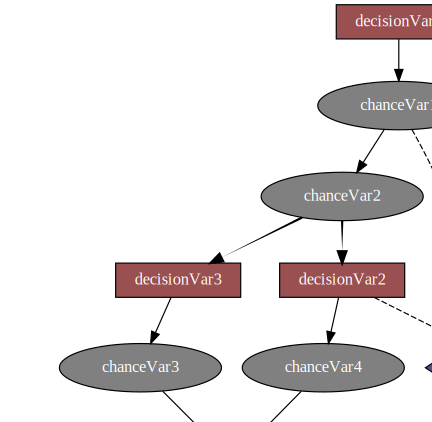

In [11]:
diag=gum.loadID("res/diag.bifxml")
gnb.showInfluenceDiagram(diag)

In [ ]:
diag

### the hard way :-)

In [ ]:
F=diag.addChanceNode(gum.LabelizedVariable("F","F",2))
diag.addArc(diag.idFromName("decisionVar1"),F)

U=diag.addUtilityNode(gum.LabelizedVariable("U","U",1))
diag.addArc(diag.idFromName("decisionVar3"),U)
diag.addArc(diag.idFromName("F"),U)
gnb.showInfluenceDiagram(diag)

In [ ]:
diag.cpt(F)[{'decisionVar1':0}]=[0.9,0.1]
diag.cpt(F)[{'decisionVar1':1}]=[0.3,0.7]

diag.utility(U)[{'F':0,'decisionVar3':0}]=2
diag.utility(U)[{'F':0,'decisionVar3':1}]=4
diag.utility(U)[{'F':1}]=[[0],[5]]

## Optimization in an influence diagram (actually LIMID)

In [12]:
oil=gum.loadID("res/OilWildcatter.bifxml")
gnb.flow.row(oil,gnb.getInference(oil))

In [13]:
# a function to show results on decision nodes T and D
def show_decisions(ie):
    gnb.flow.row(ie.optimalDecision("Testing"),
                   ie.optimalDecision("Drilling"),
                   f"$${ie.MEU()['mean']:5.3f}\\ (stdev : {math.sqrt(ie.MEU()['variance']):5.3f})$$",
                   captions=["Strategy for T",
                             "Strategy for D",
                             "MEU and its standard deviation>"])
    gnb.flow.row(ie.posterior("Testing"),ie.posteriorUtility("Testing"),
                   ie.posterior("Drilling"),ie.posteriorUtility("Drilling"),
                  captions=["Final decision for Testing","Final reward for Testing",
                            "Final decision for Drilling","Final reward for Drilling"])

ie=gum.ShaferShenoyLIMIDInference(oil) 

display(HTML("<h2>Inference in the LIMID optimizing the decisions nodes</h2>"))
ie.makeInference()
show_decisions(ie)

## Graphical inference with evidence and targets (developped nodes)

In [ ]:
gnb.sideBySide(oil,
               gnb.getInference(oil,evs={'TestResult':'closed'}),
               gnb.getInference(oil,evs={'TestResult':'open'}),
               gnb.getInference(oil,evs={'TestResult':'diffuse'}),
               oil,
               gnb.getInference(oil,evs={'OilContents':'Dry'}),
               gnb.getInference(oil,evs={'OilContents':'Wet'}),
               gnb.getInference(oil,evs={'OilContents':'Soaking'}),
               ncols=4)

## Soft evidence on chance node

In [ ]:
gnb.showInference(oil,evs={'OilContents':[0.7,0.5,0.8]})

## Forced decision

In [ ]:
gnb.showInference(oil,evs={'Drilling':'Yes'})

## LIMID versus Influence Diagram

The default inference for influence diagram actually an inference for LIMIDs. In order to use it for classical (and solvable) influence diagram, do not forget to add the sequence of decision nodes using `addNoForgettingAssumption`.

In [ ]:
infdiag=gum.fastID("Chance->*Decision1->Chance2->$Utility<-Chance3<-*Decision2<-Chance->Utility")
infdiag

In [ ]:
ie=gum.ShaferShenoyLIMIDInference(infdiag)
try:
    ie.makeInference()
except gum.GumException as e:
    print(e)

In [ ]:
ie.addNoForgettingAssumption(["Decision1","Decision2"])
gnb.sideBySide(ie.reducedLIMID(),ie.junctionTree(),gnb.getInference(infdiag,engine=ie))

## Customizing visualization of the results

Using `pyAgrum.config`, it is possible to adapt the graphical representations for Influence Diagram (see [99-Tools_configForPyAgrum.ipynb](configForPyAgrum.ipynb.html) ).

In [ ]:
gum.config.reset()
gnb.showInference(infdiag,engine=ie,size="7!")

Many visual options can be changed when displaing an inference (especially for influence diagrams)


In [ ]:
# do not show inference time
gum.config["notebook","show_inference_time"]=False
# more digits for probabilities
gum.config["notebook","histogram_horizontal_visible_digits"]=3

gnb.showInference(infdiag,engine=ie,size="7!")

In [ ]:
# specificic for influence diagram :
# more digits for utilities
gum.config["influenceDiagram","utility_visible_digits"]=5
# disabling stdev for utility and MEU
gum.config["influenceDiagram","utility_show_stdev"]=False
# showing loss (=-utility) and mEL (minimum Expected Loss) instead of MEU
gum.config["influenceDiagram","utility_show_loss"]=True

gnb.showInference(infdiag,engine=ie,size="7!")

In [ ]:
# more visual changes for influence diagram and inference
gum.config.reset()

#shape (https://graphviz.org/doc/info/shapes.html)
gum.config["influenceDiagram","chance_shape"] = "cylinder"
gum.config["influenceDiagram","utility_shape"] = "star"
gum.config["influenceDiagram","decision_shape"] = "box3d"

#colors
gum.config["influenceDiagram","default_chance_bgcolor"] = "green"
gum.config["influenceDiagram","default_utility_bgcolor"] = "MediumVioletRed"
gum.config["influenceDiagram","default_decision_bgcolor"] = "DarkSalmon"

gum.config["influenceDiagram","utility_show_stdev"]=False

gnb.sideBySide(infdiag,gnb.getInference(infdiag,engine=ie,targets=["Decision1","Chance3"]))